In [1]:
import numpy as np

import pandas as pd
pd??
import scipy
import datetime
import random
#import graphics
#from graphics import color_rgb
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 16
rcParams['figure.titlesize'] = 34
rcParams['axes.labelsize'] = 34
rcParams['legend.fontsize'] = 32

sb.set_style('whitegrid')

In [7]:
address = 'C:/Users/hannah/Documents/our life together/our-tent-is-the-best-tent_2018-06-01_export.csv'
expenses = pd.read_csv(address, parse_dates = ['Date'])
expenses.tail()


,Date,Description,Category,Cost,Currency,Hannah,Dheeraj Golla
1215,2018-05-28,Stamps,Household supplies,14.00,USD,7.00,-7.00
1216,2018-05-28,Veterinary squeak,Pets,31.00,USD,15.50,-15.50
1217,2018-05-28,Shimbashi izakaya,Dining out,20.00,USD,-10.00,10.00
1218,2018-05-30,Sprouts,Groceries,61.67,USD,30.83,-30.83
1219,2018-06-01,Total balance,,,USD,-826.08,826.08


In [8]:
expenses = expenses[:-1]
expenses.tail()
expenses = expenses.drop([0])
expenses.head()


,Date,Description,Category,Cost,Currency,Hannah,Dheeraj Golla
1,2015-07-09,Tuc to Benson gas,Gas/fuel,10.20,USD,5.10,-5.10
2,2015-07-09,Thai restaurant,Dining out,30.49,USD,-15.25,15.25
3,2015-07-09,Annual pass to NP,Other,80.00,USD,-40.00,40.00
4,2015-07-09,Bright Angel lodge 16,Hotel,16.00,USD,-8.00,8.00
5,2015-07-13,Bowling,Sports,34.00,USD,-17.00,17.00


In [17]:
expenses['Cost'] = expenses['Cost'].astype(float)
#expenses = expenses.drop(columns = ['Currency', 'Hannah', 'Dheeraj Golla'])
expenses.head()
expenses.dtypes
print type(expenses['Cost'])

<class 'pandas.core.series.Series'>


In [15]:
a=2
print type(a)

<type 'int'>


In [19]:
print expenses['Category'].unique()
cat_dict = {
    "Gas/fuel": "Gas/fuel",
    "Dining out" : "Dining out",
    "Other": "General",
    "Travel": "Travel",
    "Hotel": "Travel",
    "Sports": "Sports",
    "Bus/train": "Travel",
    "Bicycle": "Sports",
    "Music": "Entertainment",
    "Groceries": "Groceries",
    "Taxi": "Travel",
    "TV/Phone/Internet":"Internet",
    "Liquor":"Liquor",
    "Clothing":"Clothing",
    "General":"General",
    "Maintenance":"Maintenance",
    "Household supplies":"Household supplies",
    "Games":"Entertainment",
    "Movies":"Entertainment",
    "Pets": "Pets",
    "Services":"Maintenance",
    "Plane": "Travel",
    "Furniture": "Household supplies",
    "Rent": "Rent",
    "Electronics": "Entertainment",
    "Electricity": "Electricity",
    "Car": "Maintenance",
    "Insurance":"Insurance",
    "Heat/gas":"Heat/gas",
    "Parking":"Travel",
    "Trash": "Compost",
    "Cleaning": "Maintenance",
    "Gifts":"General",
    "Payment":"General",
    " ":"General",
    np.nan:"General"
}
expenses['Category_Broad'] = expenses['Category'].map(cat_dict)

['Gas/fuel' 'Dining out' 'Other' 'Hotel' 'Sports' 'Bus/train' 'Bicycle'
 'Music' 'Groceries' 'Taxi' 'TV/Phone/Internet' 'Liquor' 'Clothing'
 'General' 'Maintenance' 'Household supplies' 'Games' 'Movies' 'Pets'
 'Services' 'Plane' 'Furniture' 'Rent' 'Electronics' 'Electricity' 'Car'
 'Insurance' 'Heat/gas' 'Parking' 'Trash' 'Cleaning' 'Gifts' 'Payment']


In [20]:
expenses['Month'] = expenses['Date'].dt.month
expenses['Year'] = expenses['Date'].dt.year
expenses.head()


,Date,Description,Category,Cost,Category_Broad,Month,Year
1,2015-07-09,Tuc to Benson gas,Gas/fuel,10.20,Gas/fuel,7,2015
2,2015-07-09,Thai restaurant,Dining out,30.49,Dining out,7,2015
3,2015-07-09,Annual pass to NP,Other,80.00,General,7,2015
4,2015-07-09,Bright Angel lodge 16,Hotel,16.00,Travel,7,2015
5,2015-07-13,Bowling,Sports,34.00,Sports,7,2015


In [21]:
groceries = expenses[expenses['Category_Broad'] == 'Groceries']

dining_out = expenses[expenses['Category_Broad'] == 'Dining out']
groceries.head()

,Date,Description,Category,Cost,Category_Broad,Month,Year
13,2015-09-02,China pasta house,Groceries,18.74,Groceries,9,2015
14,2015-09-04,Ceviche din din,Groceries,48.71,Groceries,9,2015
16,2015-09-25,Experimental Thursday,Groceries,29.65,Groceries,9,2015
25,2015-10-30,Miscell safeway,Groceries,31.00,Groceries,10,2015
31,2015-11-16,Sprout's veggies,Groceries,30.24,Groceries,11,2015


In [37]:
test = expenses.groupby(['Year', 'Month'], as_index = False).sum((expenses['Category'] == 'Groceries'))

TypeError: f() takes exactly 1 argument (2 given)

In [ ]:
test = expenses.groubpy(['Year', 'Month'], as_index = False).sum

In [24]:
gpm = groceries.groupby(['Year', 'Month'], as_index = False).sum()
dopm = dining_out.groupby(['Year', 'Month'], as_index = False).sum()
gpm.head()

,Year,Month,Cost
0,2015,9,97.10
1,2015,10,31.00
2,2015,11,176.43
3,2015,12,228.57
4,2016,1,304.91


<class 'pandas.core.frame.DataFrame'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A37C18>,
      dtype=object)

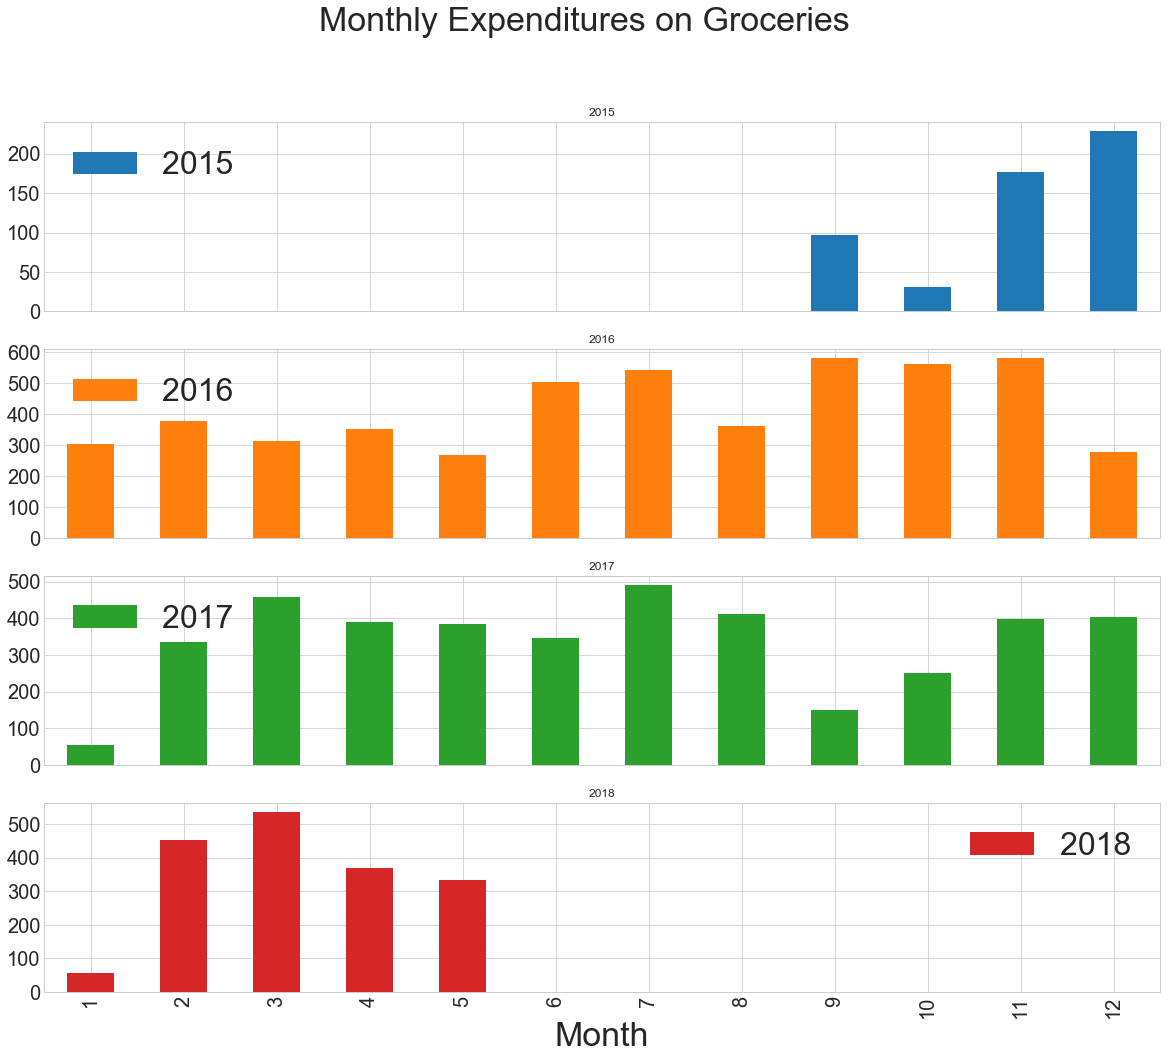

In [30]:
gpmg = gpm.pivot(columns = 'Year', index = 'Month', values = 'Cost')
dopmg = dopm.pivot(columns = 'Year', index = 'Month', values = 'Cost')
dopmg = dopmg.fillna(0)
gpmg = gpmg.fillna(0)
print(type(gpmg))
gpmg.plot(kind = 'bar',  fontsize = 20, title = "Monthly Expenditures on Groceries", subplots = True)
#gpmg.plot(kind = 'bar')

In [ ]:
#gpm.head()

#g = sb.factorplot(x=gpm.Month, y=gpm.Cost, 
                    #hue=gpm.Year, 
                    #data=gpm, kind="bar");

In [31]:
dopmg['Month'] = np.arange(1,13)
gpmg['Month'] = np.arange(1,13)
gpmg

Year,2015,2016,2017,2018,Month
Month,,,,,
1,0.00,304.91,54.46,55.28,1
2,0.00,377.22,335.34,453.10,2
3,0.00,315.36,458.41,536.42,3
4,0.00,353.27,391.14,370.83,4
5,0.00,269.16,383.63,332.51,5
6,0.00,505.97,345.51,0.00,6
7,0.00,543.18,491.14,0.00,7
8,0.00,362.91,413.20,0.00,8
9,97.10,580.46,149.97,0.00,9


In [43]:
food = pd.merge(left = gpmg, right = dopmg, on = 'Month', right_index = True, suffixes = ['_groceries', '_diningOut'])
#food = pd.merge(left = gpmg, right = dopmg,  on = gpmg.index, right_index = True, suffixes = ['_groceries', '_diningOut'])
#print food.head()
def food_diff(groceries, dining_out, colname):
    food[colname] = food[groceries]/(food[groceries]+food[dining_out])
food_diff('2015_groceries', '2015_diningOut', '2015_%groc')
food_diff('2016_groceries', '2016_diningOut', '2016_%groc')
food_diff('2017_groceries', '2017_diningOut', '2017_%groc')
food_diff('2018_groceries', '2018_diningOut', '2018_%groc')

food

Year,2015_groceries,2016_groceries,2017_groceries,2018_groceries,Month,2015_diningOut,2016_diningOut,2017_diningOut,2018_diningOut,2015_%groc,2016_%groc,2017_%groc,2018_%groc
Month,,,,,,,,,,,,,
1,0.00,304.91,54.46,55.28,1,0.00,527.86,28.71,280.07,NaN,0.366140,0.654803,0.164843
2,0.00,377.22,335.34,453.10,2,0.00,344.70,311.06,365.31,NaN,0.522523,0.518781,0.553634
3,0.00,315.36,458.41,536.42,3,0.00,284.34,117.26,14.34,NaN,0.525863,0.796307,0.973963
4,0.00,353.27,391.14,370.83,4,0.00,423.19,207.50,0.00,NaN,0.454975,0.653381,1.000000
5,0.00,269.16,383.63,332.51,5,0.00,587.78,412.30,262.00,NaN,0.314094,0.481990,0.559301
6,0.00,505.97,345.51,0.00,6,0.00,188.84,188.51,0.00,NaN,0.728213,0.646998,NaN
7,0.00,543.18,491.14,0.00,7,30.49,571.83,314.45,0.00,0.000000,0.487153,0.609665,NaN
8,0.00,362.91,413.20,0.00,8,0.00,230.26,342.35,0.00,NaN,0.611814,0.546886,NaN
9,97.10,580.46,149.97,0.00,9,0.00,175.33,214.45,0.00,1.000000,0.768018,0.411531,NaN


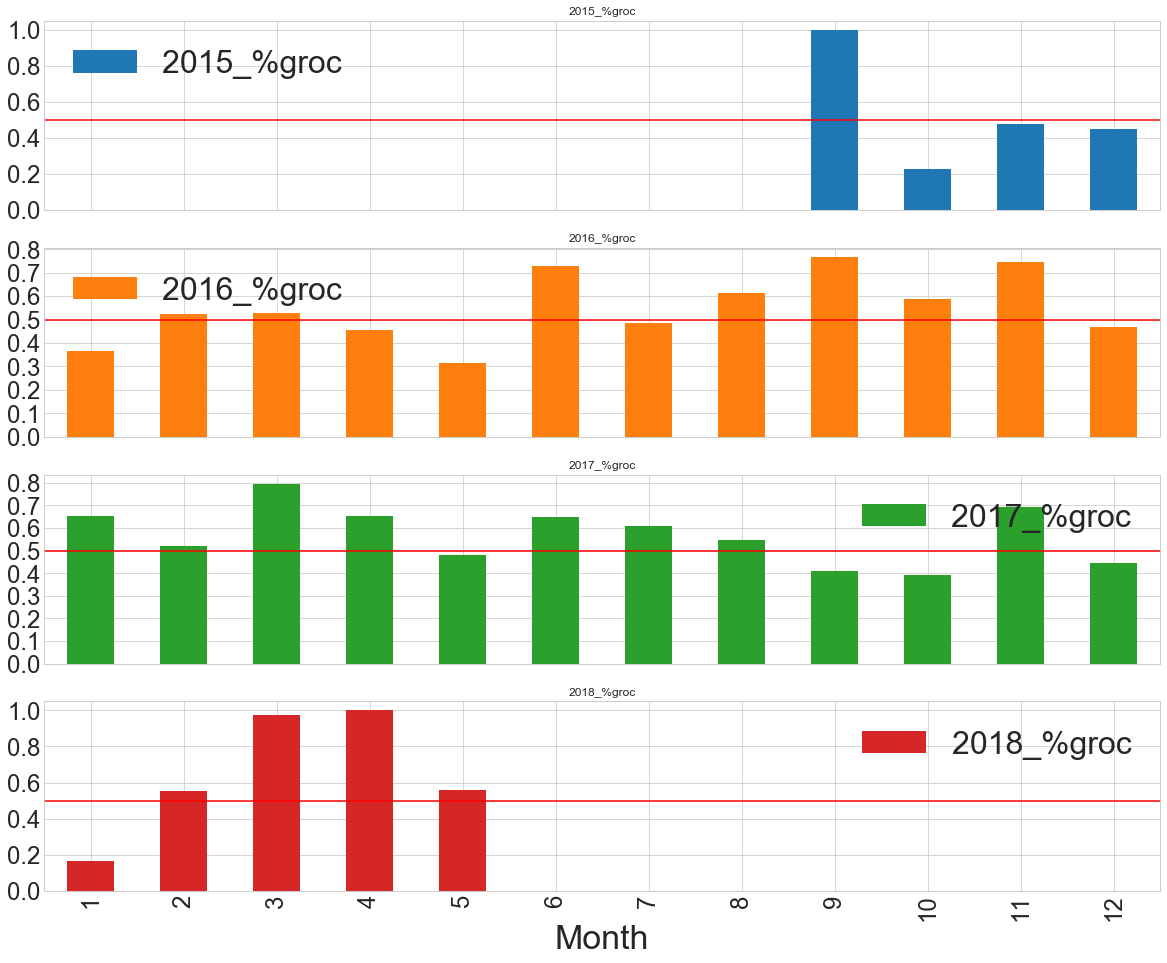

In [44]:
#foodperc = pd.DataFrame(food['2015_%groc', '2016_%groc', '2017_%groc', '2018_%groc'])
axes = food[['2015_%groc', '2016_%groc', '2017_%groc', '2018_%groc']].plot(kind = 'bar', subplots = True, fontsize=24, layout = (4,1))
for c in axes:
    for ax in c:
        ax.axhline(y = 0.5, color = 'R')
#foodperc.plot(kind = 'bar', subplots = True)

#fig = axes.get_figure()
plt.savefig('percentgroc.png')

In [ ]:
axes = food[['2015_%groc', '2016_%groc', '2017_%groc', '2018_%groc']].plot(kind = 'bar',)
axes.axhline(y = 0.5, color = 'R')
plt.savefig('percentgroc_all.png')